## Métodos númericos - EDO

Esta semana vamos explorar los metodos númericos para calcular la solución de ecuaciones diferenciales ordinarias.

Esta clase veremos los conceptos y forma de calculo de algunos de los principales metodos, la siguiente revisaremos las bibliotecas principales y finalizaremos con el desafio semanal.

- Método de Euler (metodo iterativo, el más sencillo)

Este metodo se basa en estimar pequeños segmentos de recta, donde la pendiente es la evaluación de la derivada de la función.

Revisar: https://es.wikipedia.org/wiki/M%C3%A9todo_de_Euler

A pesar que sea wikipedia, me gusta el análisis del error, en este método el error de arrastre es el más relevante (wiki habla de propagado), ya que la estimación de punto $x_{0+h}$ contiene un error y el próximo punto dependerá de este calculo.

Ejemplo:

$$\frac{dy}{dx} = y(x) \hspace{1cm} y(0)=1$$

Fijese que las condiciones iniciales son muy relevantes, dado que elimina la constante en la solución, es fácil darse cuenta que:

$$ y(x) = e^x $$

Vamos a estimar la solución de esta ecuación en el intervalo $[0,1]$, con 10 intervalos.

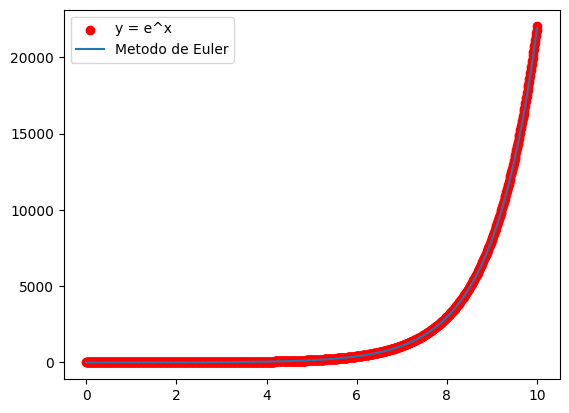

Error porcentual = 0.4991440059238776 %


In [2]:
# Metodo de Euler
import numpy as np
import matplotlib.pyplot as plt

N = 1000
x = np.linspace(0,10,N+1)
#print(x, type(x), type(x[0]))
# No hay problema al sumar 0.1, ya que tiene 64 bits el ndarray

# vamos ahora a calcular la solución de la ecuacion diferencial usando Euler
y = np.exp(x)
y_euler = [1] # dado que y_0 = 1
for i in range(N):
    y_euler.append(y_euler[-1]+10*y[i]/N)

plt.scatter(x, y, label="y = e^x", color="red")
plt.plot(x, y_euler, label="Metodo de Euler")
#plt.ylim(0,4)
plt.legend()
plt.show()

print("Error porcentual =", 100*(y[-1]-y_euler[-1])/y[-1], "%")

PROBAR: Que pasa si se aumenta el intervalo, aumenta N y compartamiento del error.

- Método de Runge-Kutta 4 (mayor precisión, estima el punto con un promedio ponderado)

Este metodo iterativo, en vez de calcular el siguiente punto con la evaluación de la función en el punto, lo hace con un promedio ponderado utilizando 4 constantes, también se le dice de cuarto orden.

Revisar: https://es.wikipedia.org/wiki/M%C3%A9todo_de_Runge-Kutta

Se calcula de la siguiente forma:

$$ y_{i+1} = y_{i} + \frac{1}{6} h (k_{1}+2k_{2}+2k_{3}+k_{4})$$

Donde:

$$ k_1 = f(x_i, y_i) $$

$$ k_2 = f( x_i + \frac{h}{2},  y_i + \frac{k_1 h}{2}) $$

$$ k_3 = f( x_i + \frac{h}{2},  y_i + \frac{k_2 h}{2}) $$

$$ k_4 = f(x_i + h, y_i + k_3 h)$$

Donde h es el ancho del intervalo.

Veamos el mismo ejemplo:

$$\frac{dy}{dx} = y(x) \hspace{1cm} y(0)=1$$

[0.    0.001 0.002 ... 0.998 0.999 1.   ] <class 'numpy.ndarray'> <class 'numpy.float64'>


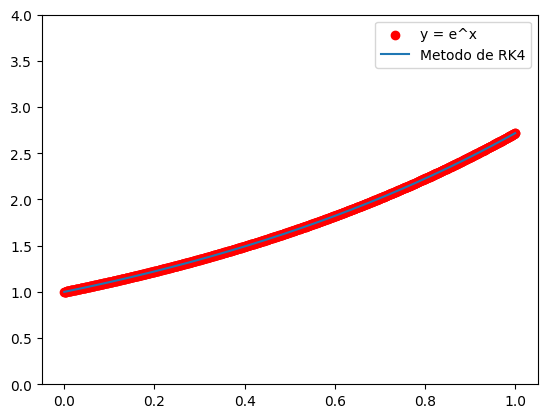

Error porcentual = 7.515079356095788e-13 %


In [4]:
# Metodo de Runge-Kutta 4
import numpy as np
import matplotlib.pyplot as plt

N = 1000
x = np.linspace(0,1,N+1)
print(x, type(x), type(x[0]))
# No hay problema al sumar 0.1, ya que tiene 64 bits el ndarray

# vamos ahora a calcular la solución de la ecuacion diferencial usando Euler
y = np.exp(x)
y_rk4 = [1] # dado que y_0 = 1
h = 1/N
for i in range(N):
    k1 = y_rk4[-1]
    k2 = y_rk4[-1] + k1*h/2
    k3 = y_rk4[-1] + k2*h/2
    k4 = y_rk4[-1] + k3*h
    y_rk4.append(y_rk4[-1]+h*(k1+2*k2+2*k3+k4)/6)

plt.scatter(x, y, label="y = e^x", color="red")
plt.plot(x, y_rk4, label="Metodo de RK4")
plt.ylim(0,4)
plt.legend()
plt.show()

print("Error porcentual =", 100*(y[-1]-y_rk4[-1])/y[-1], "%")

La idea era que mañana veremos https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html
pero descubri que ahora se usa https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html